In [1]:
#李英杰-2016011530-15.5
import numpy as np
import tensorflow as tf
import scipy as sp
import random

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#开启eager模式
tf.enable_eager_execution()

In [3]:
#加载及查看数据
iris=load_iris()
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [49]:
iris.data.shape
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
# 从使用train_test_split，利用随机种子random_state采样20%的数据作为测试集。
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, 
                                                    random_state=33)

ValueError: tf.enable_eager_execution must be called at program startup.

In [95]:
#tensorflow求欧氏距离

def Eucdist(trainSet,testSet):
    tr=tf.constant(trainSet)
    te=tf.constant(testSet)
    
    euclidean = tf.sqrt(tf.reduce_sum(tf.square(tr-te), 1)).numpy()
    #sorted_distances = sorted(euclidean, key=itemgetter(0))
    return euclidean

In [48]:
#求k个邻近样本的索引
def Neighbors(trainSet,testSet,k):
    y=Eucdist(trainSet,testSet).argsort()
    neighbors = []
    for x in range(k):
        neighbors.append(y[x])
    #print(neighbors)
    return neighbors

[7]
[73]
[77]
[47]
[66]
[102]
[16]
[51]
[21]
[4]
[91]
[31]
[104]
[97]
[5]
[12]
[46]
[60]
[55]
[33]
[9]
[22]
[38]
[71]
[52]
[58]
[78]
[12]
[57]
[46]
[7, 96]
[73, 47]
[77, 88]
[47, 73]
[66, 95]
[102, 4]
[16, 84]
[51, 59]
[21, 66]
[4, 91]
[91, 102]
[31, 53]
[104, 3]
[97, 78]
[5, 65]
[12, 73]
[46, 27]
[60, 51]
[55, 34]
[33, 114]
[9, 71]
[22, 93]
[38, 48]
[71, 111]
[52, 95]
[58, 46]
[78, 97]
[12, 90]
[57, 61]
[46, 6]
[7, 96, 99]
[73, 47, 1]
[77, 88, 16]
[47, 73, 42]
[66, 95, 30]
[102, 4, 91]
[16, 84, 77]
[51, 59, 32]
[21, 66, 48]
[4, 91, 102]
[91, 102, 4]
[31, 53, 49]
[104, 3, 102]
[97, 78, 12]
[5, 65, 37]
[12, 73, 47]
[46, 27, 58]
[60, 51, 18]
[55, 34, 46]
[33, 114, 87]
[9, 71, 77]
[22, 93, 82]
[38, 48, 4]
[71, 111, 9]
[52, 95, 35]
[58, 46, 116]
[78, 97, 12]
[12, 90, 11]
[57, 61, 21]
[46, 6, 112]
[7, 96, 99, 0]
[73, 47, 1, 55]
[77, 88, 16, 64]
[47, 73, 42, 1]
[66, 95, 30, 61]
[102, 4, 91, 104]
[16, 84, 77, 94]
[51, 59, 32, 18]
[21, 66, 48, 61]
[4, 91, 102, 37]
[91, 102, 4, 114]
[31, 53, 49

In [75]:
#计数
def getRes(neighbors):
    classVotes = {}
    classVotes[0]=0
    classVotes[1]=0
    classVotes[2]=0
    for n in neighbors:
        if y_train[n]==0:
            classVotes[0]+=1
        elif y_train[n]==1:
            classVotes[1]+=1
        elif y_train[n]==2:
            classVotes[2]+=1
    sortedVotes = sorted(classVotes.items(), key=itemgetter(1), reverse=True)
    return sortedVotes[0][0]

1

In [96]:
#准确度
def getAc(testy, predictions):
    correct = 0
    for x in range(len(testy)):
        if testy[x] == predictions[x]:
            correct += 1
    return (correct/float(len(testy))) * 100.0

#传入样本集进行分类
K=[i for i in range(1,21)]
Ac=[]
for k in K:
    predictions=[]
    for i in range(30):
        nei=Neighbors(X_train,X_test[i],k)
        res=getRes(nei)
        predictions.append(res)
    Ac.append(getAc(y_test, predictions))

[7]
[73]
[77]
[47]
[66]
[102]
[16]
[51]
[21]
[4]
[91]
[31]
[104]
[97]
[5]
[12]
[46]
[60]
[55]
[33]
[9]
[22]
[38]
[71]
[52]
[58]
[78]
[12]
[57]
[46]
[7, 96]
[73, 47]
[77, 88]
[47, 73]
[66, 95]
[102, 4]
[16, 84]
[51, 59]
[21, 66]
[4, 91]
[91, 102]
[31, 53]
[104, 3]
[97, 78]
[5, 65]
[12, 73]
[46, 27]
[60, 51]
[55, 34]
[33, 114]
[9, 71]
[22, 93]
[38, 48]
[71, 111]
[52, 95]
[58, 46]
[78, 97]
[12, 90]
[57, 61]
[46, 6]
[7, 96, 99]
[73, 47, 1]
[77, 88, 16]
[47, 73, 42]
[66, 95, 30]
[102, 4, 91]
[16, 84, 77]
[51, 59, 32]
[21, 66, 48]
[4, 91, 102]
[91, 102, 4]
[31, 53, 49]
[104, 3, 102]
[97, 78, 12]
[5, 65, 37]
[12, 73, 47]
[46, 27, 58]
[60, 51, 18]
[55, 34, 46]
[33, 114, 87]
[9, 71, 77]
[22, 93, 82]
[38, 48, 4]
[71, 111, 9]
[52, 95, 35]
[58, 46, 116]
[78, 97, 12]
[12, 90, 11]
[57, 61, 21]
[46, 6, 112]
[7, 96, 99, 0]
[73, 47, 1, 55]
[77, 88, 16, 64]
[47, 73, 42, 1]
[66, 95, 30, 61]
[102, 4, 91, 104]
[16, 84, 77, 94]
[51, 59, 32, 18]
[21, 66, 48, 61]
[4, 91, 102, 37]
[91, 102, 4, 114]
[31, 53, 49

[57, 61, 21, 5, 3, 108, 37, 48, 65, 38, 66, 58, 46, 30]
[46, 6, 112, 27, 95, 2, 58, 30, 39, 61, 24, 66, 116, 57]
[7, 96, 99, 0, 113, 74, 11, 92, 90, 117, 75, 78, 100, 26, 12]
[73, 47, 1, 55, 23, 42, 80, 12, 108, 78, 97, 34, 113, 58, 30]
[77, 88, 16, 64, 9, 13, 14, 111, 71, 79, 94, 69, 84, 53, 18]
[47, 73, 42, 1, 55, 52, 12, 58, 97, 78, 108, 30, 80, 10, 46]
[66, 95, 30, 61, 21, 52, 81, 112, 6, 48, 116, 58, 38, 46, 97]
[102, 4, 91, 104, 38, 3, 48, 37, 66, 21, 114, 50, 65, 5, 57]
[16, 84, 77, 94, 98, 18, 9, 56, 79, 88, 40, 69, 14, 28, 64]
[51, 59, 32, 18, 60, 94, 69, 19, 84, 28, 41, 82, 107, 44, 40]
[21, 66, 48, 61, 57, 37, 91, 38, 3, 65, 30, 108, 104, 5, 4]
[4, 91, 102, 37, 65, 114, 5, 3, 38, 50, 48, 21, 57, 104, 33]
[91, 102, 4, 114, 37, 65, 50, 38, 48, 3, 21, 5, 104, 66, 33]
[31, 53, 49, 88, 64, 13, 111, 14, 77, 71, 9, 16, 110, 79, 69]
[104, 3, 102, 4, 91, 38, 48, 5, 57, 37, 21, 65, 66, 61, 24]
[97, 78, 12, 46, 74, 30, 55, 95, 52, 47, 58, 27, 113, 117, 34]
[5, 65, 37, 57, 3, 4, 108, 91

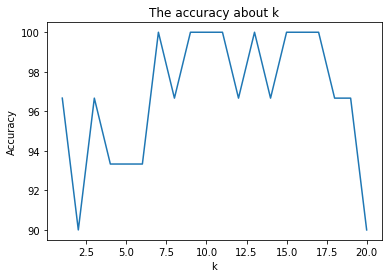

In [94]:
import matplotlib.pyplot as plt
 
x = K
y = Ac
 
plt.plot(x, y)
 
plt.title('The accuracy about k')
plt.xlabel('k')
plt.ylabel('Accuracy')
 
plt.show()

2


IndexError: too many indices for array